In [24]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import datetime as dt

top200 = "datasets/Top200.csv"
topgenre = "datasets/Top10000genre.csv"

top200_df = pd.read_csv(top200)
topgenre_df = pd.read_csv(topgenre)

top200_df = top200_df.drop(columns=['Index','Song ID','Chord','Valence','Duration (ms)','Tempo','Liveness','Acousticness','Speechiness'])
topgenre_df = topgenre_df.drop(columns=['track_id','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])
# genre = []
# genre = (pd.unique(topgenre_df['genre']))
# genre200 = []
# genre200 = (pd.unique(top200_df['Genre']))
# genre200

# top200_df.columns
# top200_df.Genre.value_counts()
# pop_genre = top200_df[top200_df['Genre'].str.contains('pop')]
# pop_genre = top200_df[(top200_df['Genre'].str.contains('pop')) & (top200_df['Genre'].str.len()<2)]
top200_df.Genre= top200_df.Genre.str.replace('[','')
top200_df.Genre= top200_df.Genre.str.replace(']','')
top200_df.Genre = top200_df.Genre.str.split(',')
top200_df = top200_df.explode('Genre')
top200_df.Genre = top200_df.Genre.str.replace("\'", "")

top200_df.Genre.unique()

/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_17071/1381528724.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top200_df.Genre= top200_df.Genre.str.replace('[','')
/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_17071/1381528724.py:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  top200_df.Genre= top200_df.Genre.str.replace(']','')


array(['indie rock italiano', ' italian pop', 'australian hip hop', 'pop',
       ' uk pop', 'lgbtq+ hip hop', ' pop rap', 'dance pop', ' pop',
       'puerto rican pop', ' trap latino', 'latin', ' reggaeton',
       ' reggaeton colombiano', 'k-pop', ' k-pop boy group',
       'canadian pop', ' post-teen pop', 'canadian contemporary r&b',
       ' canadian pop', 'reggaeton', 'gauze pop', ' indietronica',
       ' shiver pop', ' latin hip hop', 'dfw rap', ' melodic rap', ' rap',
       ' house', ' pop dance', ' tropical house', ' uk dance',
       ' electropop', 'colombian pop', ' latin', ' ', 'chicago rap',
       ' panamanian pop', 'latin pop', ' pop argentino', 'big room',
       ' brostep', ' dance pop', ' dutch edm', ' edm', ' electro house',
       ' slap house', ' trance', 'cali rap', 'trap argentino', '',
       'argentine hip hop', ' pop venezolano', ' trap argentino',
       'electropop', 'house', 'brostep', ' progressive electro house',
       'dreamo', ' indie surf', ' surf 

In [2]:
#sorting music for word included (contains overlap)
pop_any = top200_df[top200_df.Genre.str.contains('pop')]
pop_any["new_genre"]="Pop"
hiphop_any = top200_df[top200_df.Genre.str.contains('hip hop')]
hiphop_any["new_genre"]="Hip-Hop"
rap_any = top200_df[top200_df.Genre.str.contains('rap')]
rap_any["new_genre"]="Rap"
rb_any = top200_df[top200_df.Genre.str.contains('r&b')]
rb_any["new_genre"]="R&B"
country_any = top200_df[top200_df.Genre.str.contains('country')]
country_any["new_genre"]="Country"
rock_any = top200_df[top200_df.Genre.str.contains('rock')]
rock_any["new_genre"]="Rock"
alt_any = top200_df[top200_df.Genre.str.contains('alternative')]
alt_any["new_genre"]="Alter."
dance_any = top200_df[top200_df.Genre.str.contains('dance')]
dance_any["new_genre"]="Dance"
edm_any = top200_df[top200_df.Genre.str.contains('edm')]
edm_any["new_genre"]="EDM"
jazz_any = top200_df[top200_df.Genre.str.contains('jazz')]
jazz_any["new_genre"]="Jazz"
indie_any = top200_df[top200_df.Genre.str.contains('indie')]
indie_any["new_genre"]="Indie"
itl_any = top200_df[top200_df.Genre.str.contains('italiano')]
itl_any["new_genre"]="Italian"
span_any = top200_df[top200_df.Genre.str.contains('reggaeton')]
span_any["new_genre"]="Reggae"
trap_any = top200_df[top200_df.Genre.str.contains('trap')]
trap_any["new_genre"]="Trap"
latin_any = top200_df[top200_df.Genre.str.contains('latin')]
latin_any["new_genre"]="Latin"

/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_17071/67611283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_any["new_genre"]="Pop"
/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_17071/67611283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiphop_any["new_genre"]="Hip-Hop"
/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_17071/67611283.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [3]:
#setting other category 
genre_list = ['pop','hip hop','rap','r&b','country','rock','alternative','dance','edm','jazz','indie','italiano','reggaeton','trap','latin']
pattern = '|'.join(genre_list)
result = top200_df.loc[~(top200_df['Genre'].str.contains(pattern, case=False))]
other = result
other_genre = (pd.unique(result['Genre']))

In [4]:
df_list = [pop_any,hiphop_any,rap_any,rb_any,country_any,rock_any,alt_any,dance_any,edm_any,jazz_any,indie_any,itl_any,span_any,trap_any,latin_any]
new_genre_df = pd.concat(df_list)
new_genre_df.Streams = new_genre_df.Streams.str.replace('"', '')
new_genre_df.Streams = new_genre_df.Streams.str.replace(',', '')
new_genre_df["Streams"] = new_genre_df[["Streams"]].apply(pd.to_numeric)

new_genre_group = new_genre_df.groupby('new_genre')['Streams'].mean().reset_index()


In [5]:

%matplotlib inline 
%matplotlib notebook
import pandas as pd
import numpy as np

num_pop = pop_any.Genre.count()
num_rap = rap_any.Genre.count()
num_hiphop = hiphop_any.Genre.count()
num_rb = rb_any.Genre.count()
num_country = country_any.Genre.count()
num_rock = rock_any.Genre.count()
num_alt = alt_any.Genre.count()
num_dance = dance_any.Genre.count()
num_edm = edm_any.Genre.count()
num_jazz = jazz_any.Genre.count()
num_indie = indie_any.Genre.count()
num_itl = itl_any.Genre.count()
num_span = span_any.Genre.count()
num_trap = trap_any.Genre.count()
num_latin = latin_any.Genre.count()
num_other = other.Genre.count()


In [6]:
genre_df = pd.DataFrame ({'Genre':['Pop','Hip Hop','Rap','R&B','Rock','Dance','EDM','Indie','Reggaeton','Trap','Latin','Other'],
'frequency':[num_pop, num_hiphop,num_rap,num_rb,num_rock,num_dance,num_edm,num_indie,num_span,num_trap,num_latin,num_other]})
genre_df

,Genre,frequency
0,Pop,1790
1,Hip Hop,543
2,Rap,1235
3,R&B,81
4,Rock,146
5,Dance,333
6,EDM,61
7,Indie,44
8,Reggaeton,226
9,Trap,395


<IPython.core.display.Javascript object>


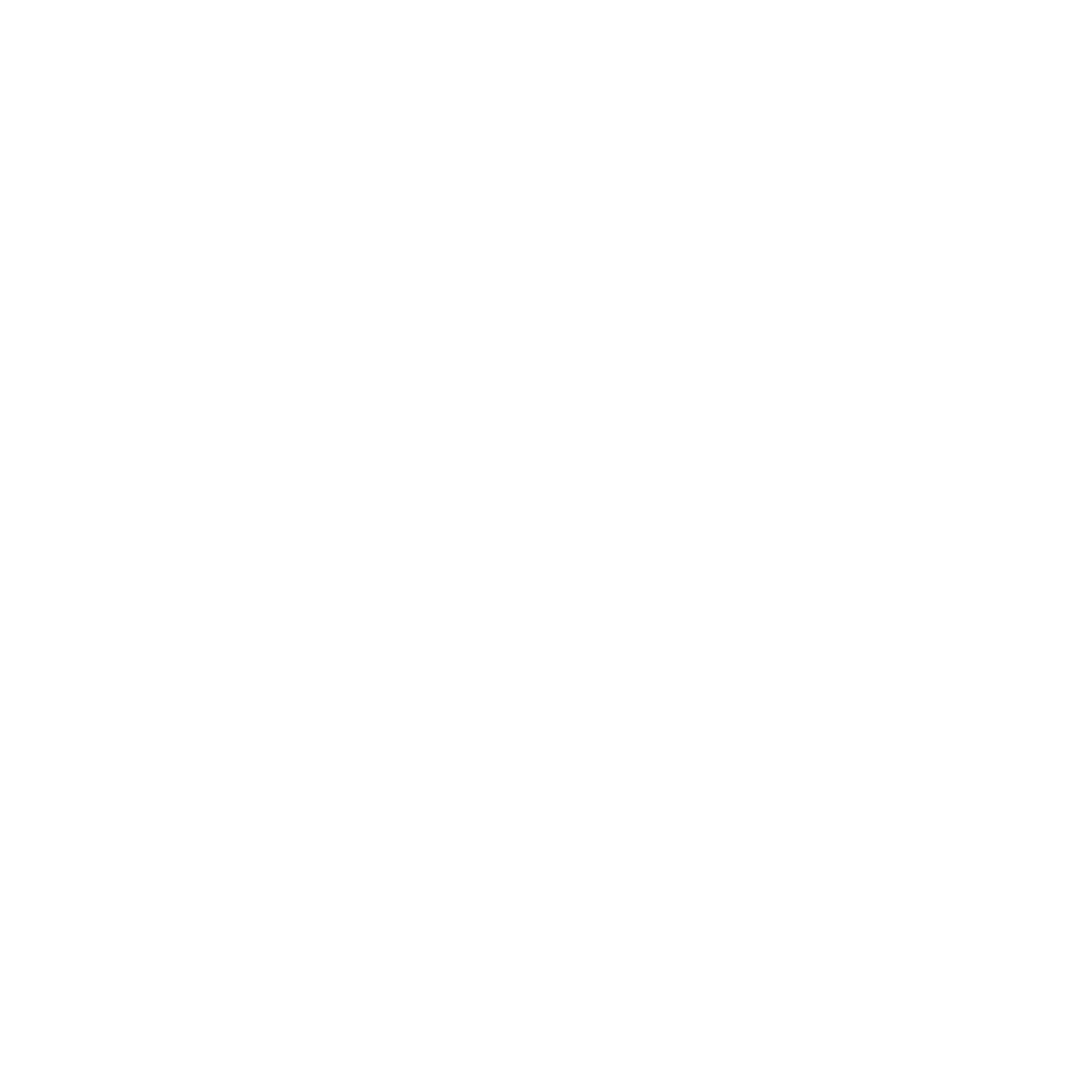

Text(0.5, 1.0, 'Genre')

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
# import seaborn as sns
# sns.set()

label = ['Pop','Hip Hop','Rap','R&B','Rock','Dance','EDM','Indie','Reggaeton','Trap','Latin','Other']
colors = ['#FF0000', '#800000', '#FFFF00', '#808000', '#00FF00', '#008000', '#00FFFF', '#008080', '#0000FF', '#000080', '#FF00FF', '#800080']


plot = genre_df.plot.pie(y='frequency', colors=colors, figsize=(15, 15))
plt.legend(label,
          title="Genre",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Genre")

In [8]:
# Color coated scatter plot with stream comparison + genre
top200_df.Streams = top200_df.Streams.str.replace('"', '')
top200_df.Streams = top200_df.Streams.str.replace(',', '')


In [9]:
top200_df["Streams"] = top200_df[["Streams"]].apply(pd.to_numeric)

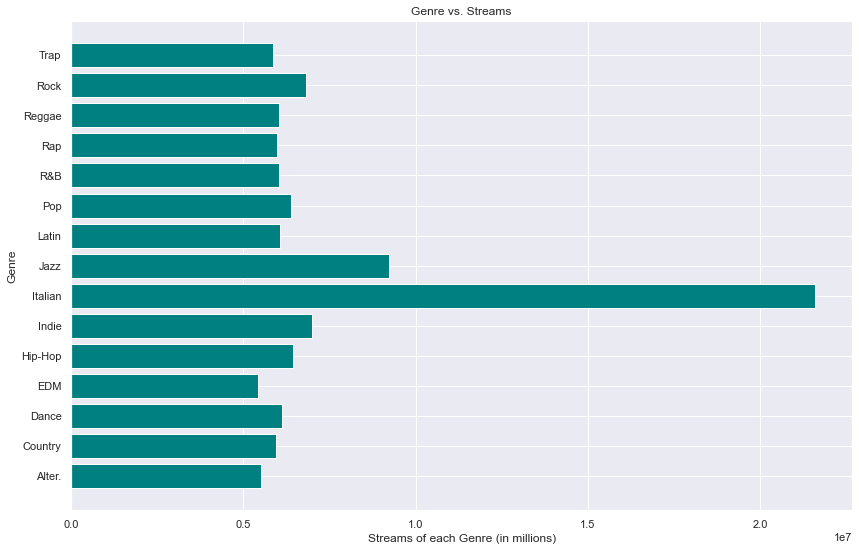

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
plt.figure(figsize=(14,9))
x_axis = new_genre_group['new_genre']
y_axis = new_genre_group['Streams']
plt.barh(x_axis, y_axis, color='#008080')
plt.xlabel('Streams of each Genre (in millions)')
plt.ylabel('Genre')
plt.title(f'Genre vs. Streams')
plt.savefig("barh.png")

In [11]:
def clean_weeks_charted(weeks_str):
    try: 
        return weeks_str.split('--')[-2].split('\n')[1]
    except:
        return weeks_str.split('--')[-2]
   

In [12]:
top200_df = top200_df.reset_index()

In [13]:
# From date of song release to how long it took to hit the chart
top200_df['Release Date']
top200_df['first_week'] = top200_df['Weeks Charted'].apply(clean_weeks_charted)
# top200_df["subtracted_date"]= top200_df["Release Date"]-top200_df["first_week"]
# top200_df

In [14]:
subtracted_dates = []
for i in range(0,len(top200_df['Release Date'].values)):
    release_date = top200_df ['Release Date'][i]
    chart_date = top200_df ['first_week'][i]
    try:
        release_date_time = (dt.datetime(int(release_date[0:4]),int(release_date[5:7]),int(release_date[8:])))
        chart_date_time = (dt.datetime(int(chart_date[0:4]),int(chart_date[5:7]),int(chart_date[8:])))
        subtracted_dates.append (release_date_time - chart_date_time)
    except:
        subtracted_dates.append('')
subtracted_dates

[datetime.timedelta(days=-1274),
 datetime.timedelta(days=-1274),
 datetime.timedelta(0),
 datetime.timedelta(days=7),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(days=5),
 datetime.timedelta(days=5),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(days=-1),
 datetime.timedelta(days=-1),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(days=-63),
 datetime.timedelta(days=-63),
 datetime.timedelta(days=-1),
 datetime.timedelta(days=-1),
 datetime.timedelta(days=-1),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(days=14),
 datetime.timedelta(days=14),
 datetime.timedelta(0),
 datetime.timedelta(days=49),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedel

In [15]:
def strip_days (timedelta):
    try:
        return int(str(timedelta).split(" ")[0])
    except:
        return -1

In [16]:
top200_df['timedelta']= subtracted_dates
top200_df["timedelta"] = top200_df["timedelta"].apply(strip_days)
final_plotting_df = top200_df[top200_df["timedelta"]!=-1].reset_index()
final_plotting_df

/var/folders/tn/m51dm4nd5wv2rw2867yd_l_h0000gn/T/ipykernel_17071/3208297996.py:1: FutureWarning: Inferring timedelta64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  top200_df['timedelta']= subtracted_dates


,level_0,index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,first_week,timedelta
0,0,0,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,indie rock italiano,2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,2021-06-04,-1274
1,1,0,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762,italian pop,2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,2021-06-04,-1274
2,2,1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,australian hip hop,2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,2021-07-09,0
3,3,2,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514,pop,2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,2021-05-14,7
4,4,3,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380,pop,2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,2021-06-25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,4660,1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747,post-teen pop,2018-01-12,2019-12-27--2020-01-03,81,0.765,0.523,-4.333,2019-12-27,-714
4280,4661,1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,brega funk,2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,2019-12-27,-93
4281,4662,1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630,funk carioca,2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,2019-12-27,-93
4282,4663,1555,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],4595450,Taylor Swift,42227614,pop,2019-11-13,2019-12-27--2020-01-03,70,0.448,0.603,-7.176,2019-12-27,-44


<Figure size 1008x1080 with 0 Axes>

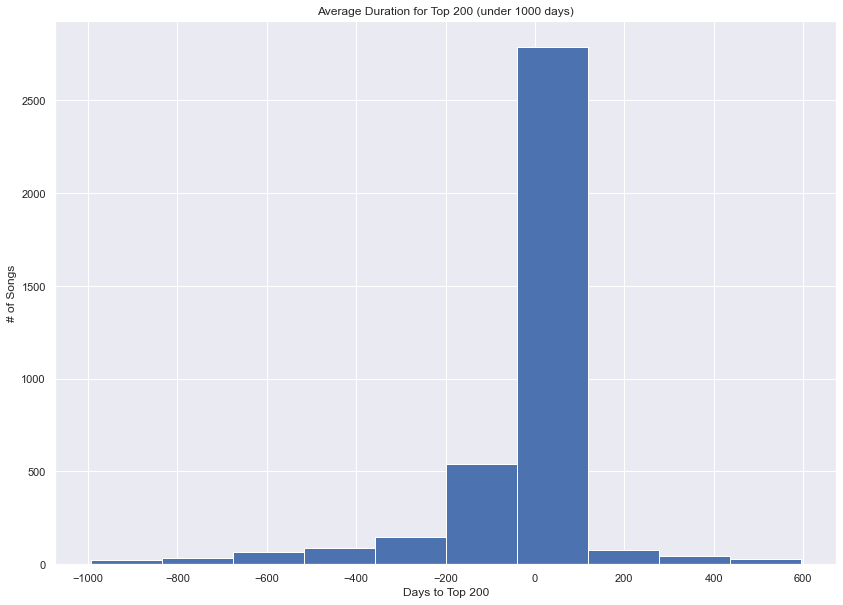

In [17]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,15))
reduced_df = final_plotting_df[final_plotting_df['timedelta']>=-1000]
reduced_df.hist(column='timedelta', figsize=(14,10))
plt.xlabel('Days to Top 200')
plt.ylabel('# of Songs')
plt.title(f'Average Duration for Top 200 (under 1000 days)')

plt.show()


<Figure size 720x720 with 0 Axes>

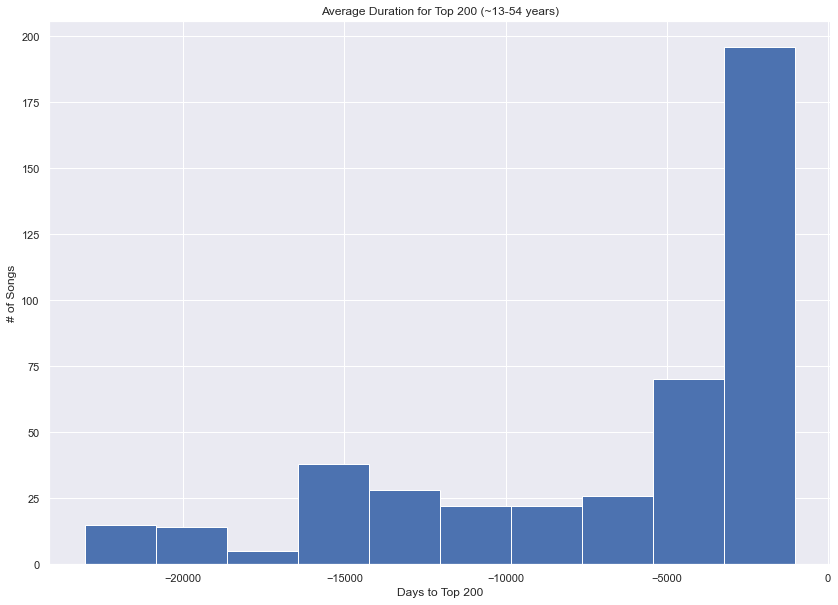

In [18]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,10))
reduced_df = final_plotting_df[(final_plotting_df['timedelta']<=-1000)& (final_plotting_df['timedelta']>=-25000)]
reduced_df.hist(column='timedelta', figsize=(14,10))
plt.xlabel('Days to Top 200')
plt.ylabel('# of Songs')
plt.title(f'Average Duration for Top 200 (~13-54 years)')
plt.savefig("54-13.png")
plt.show()

In [19]:
# reduced_df['timedelta']reduced_df['timedelta']


In [20]:
# Take earliest week charted and subtract from release date to get the length of time it took to hit the charts

In [21]:
# Use this information to make a bar graph 